MNIST Fashion dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df=pd.read_csv("fashion-mnist_train.csv")

In [5]:
fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
fashion_test_df=pd.read_csv("fashion-mnist_test.csv")

In [8]:
fashion_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [9]:
fashion_train_df.shape

(60000, 785)

In [10]:
fashion_test_df.shape

(10000, 785)

In [11]:
training=np.array(fashion_train_df,dtype='float32')

In [12]:
testing=np.array(fashion_test_df,dtype='float32')

3.0

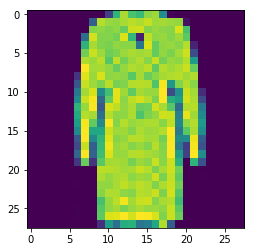

In [23]:
import random
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
label

In [24]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [26]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_validate,y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 49)

In [29]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28,1))

In [30]:
X_test = X_test.reshape(X_test.shape[0], *(28, 28,1))

In [32]:
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28,1))

In [33]:
X_train.shape

(48000, 28, 28, 1)

In [34]:
X_test.shape

(10000, 28, 28, 1)

In [35]:
X_validate.shape

(12000, 28, 28, 1)

In [39]:
import keras
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [40]:
cnn_model = Sequential()

In [41]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28,28,1), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [43]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [44]:
cnn_model.add(Flatten())

In [45]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [46]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [48]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics = ['accuracy'])

In [49]:
epochs = 50

In [53]:
cnn_model.fit(X_train,
            y_train,
            batch_size = 512,
            nb_epoch = epochs,
            verbose = 1,
            validation_data = (X_validate, y_validate))

Instructions for updating:
Use tf.cast instead.


C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.9071 - acc: 0.6779 - val_loss: 0.5139 - val_acc: 0.8243
Epoch 2/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.4430 - acc: 0.8456 - val_loss: 0.4246 - val_acc: 0.8529
Epoch 3/50
48000/48000 [==============================] - 64s 1ms/step - loss: 0.3913 - acc: 0.8645 - val_loss: 0.3786 - val_acc: 0.8673
Epoch 4/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.3568 - acc: 0.8753 - val_loss: 0.3543 - val_acc: 0.8773
Epoch 5/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.3394 - acc: 0.8810 - val_loss: 0.3418 - val_acc: 0.8800
Epoch 6/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.3209 - acc: 0.8875 - val_loss: 0.3362 - val_acc: 0.8794
Epoch 7/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.3019 - acc: 0.8947 - val_loss: 0.3289 - val_acc

In [54]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 10s 963us/step
Test Accuracy : 0.915


In [55]:
predicted_classes = cnn_model.predict_classes(X_test)

In [56]:
predicted_classes

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

AttributeError: module 'matplotlib.pyplot' has no attribute 'subplot_adjust'

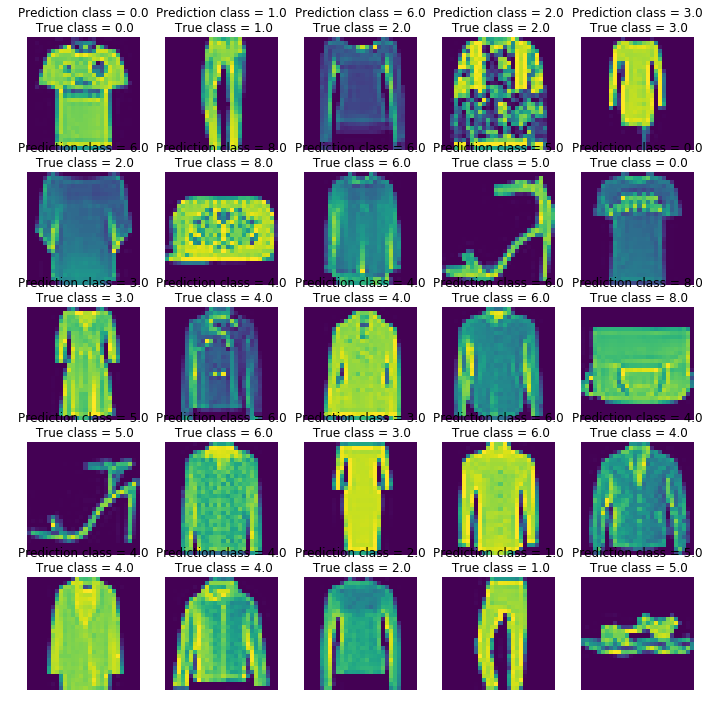

In [59]:
L = 5
W = 5
fig, axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplot_adjust(wspace=0.5)

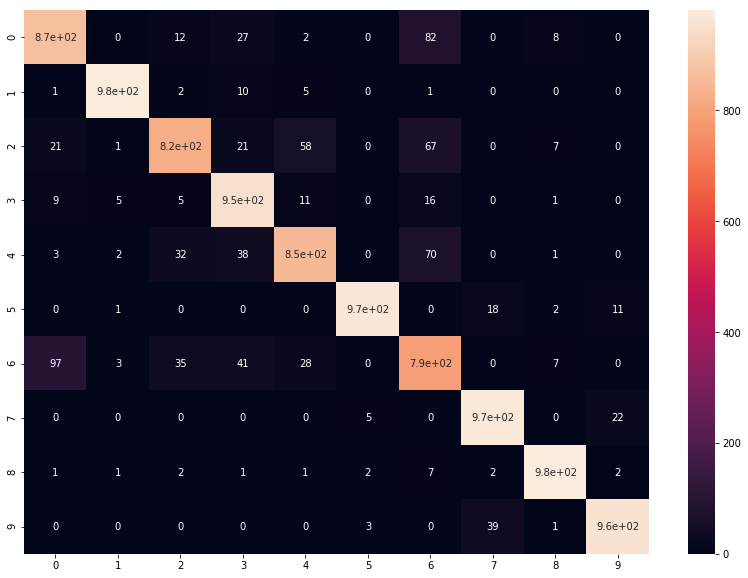

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [69]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes,target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.87      0.87      1000
     class 1       0.99      0.98      0.98      1000
     class 2       0.90      0.82      0.86      1000
     class 3       0.87      0.95      0.91      1000
     class 4       0.89      0.85      0.87      1000
     class 5       0.99      0.97      0.98      1000
     class 6       0.76      0.79      0.78      1000
     class 7       0.94      0.97      0.96      1000
     class 8       0.97      0.98      0.98      1000
     class 9       0.96      0.96      0.96      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000

